# Instacart Market Basket Analysis

Which products will an Instacart consumer purchase again?

- https://www.kaggle.com/competitions/instacart-market-basket-analysis/overview
- https://gist.github.com/jeremystan/c3b39d947d9b88b3ccff3147dbcf6c6b


### 1. 패키지 및 라이브러리 불러오기


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### 2. 데이터셋 불러오기


In [2]:
# mkdir ./data
# !kaggle competitions download -c instacart-market-basket-analysis

In [3]:
path = "./data/instacart-market-basket-analysis/"

df_orders = pd.read_csv(path + "orders.csv")
df_products = pd.read_csv(path + "products.csv")
df_aisle = pd.read_csv(path + "aisles.csv")
df_departments = pd.read_csv(path + "departments.csv")
df_order_products_prior = pd.read_csv(path + "order_products__prior.csv")
df_order_products_train = pd.read_csv(path + "order_products__train.csv")

In [4]:
print("df_orders.info()")
print(df_orders.info())
print("=" * 50)
print("df_products.info()")
print(df_products.info())
print("=" * 50)
print("df_aisle.info()")
print(df_aisle.info())
print("=" * 50)
print("df_departments.info()")
print(df_departments.info())
print("=" * 50)
print("df_order_products_prior.info()")
print(df_order_products_prior.info())
print("=" * 50)
print("df_order_products_train.info()")
print(df_order_products_train.info())

df_orders.info()
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3421083 entries, 0 to 3421082
Data columns (total 7 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   order_id                int64  
 1   user_id                 int64  
 2   eval_set                object 
 3   order_number            int64  
 4   order_dow               int64  
 5   order_hour_of_day       int64  
 6   days_since_prior_order  float64
dtypes: float64(1), int64(5), object(1)
memory usage: 182.7+ MB
None
df_products.info()
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49688 entries, 0 to 49687
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49688 non-null  int64 
 1   product_name   49688 non-null  object
 2   aisle_id       49688 non-null  int64 
 3   department_id  49688 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB
None
df_aisle.info()
<class 'panda

### 3. EDA

1. 고객이 가장 많이 주문한 요일은?
2. 고객이 가장 많이 주문한 시간은?
3. 요일별 가장 많이 (재)주문한 상품은?
4. 시간별 가장 많이 (재)주문한 상품은?
5. 이전 주문 장바구니 포함 여부와 재주문과의 관계
   1. → 이전 장바구니에 포함된 상품은 재주문할 것이다.
   2. → 재주문한 상품이 이전 장바구니에 포함된 횟수
6. 이전 주문 장바구니 순서와 재주문과의 관계
   1. → 이전 장바구니에 포함된 순서가 높을수록 재주문하는 경우가 많을 것이다.
   2. → 재주문한 상품이 이전 장바구니에서 갖는 평균 우선순위


##### 1) 요일별 총 주문 상품의 갯수


In [5]:
df_orders_prtr = df_orders[
    (df_orders["eval_set"] == "prior") | (df_orders["eval_set"] == "train")
]

<Axes: xlabel='order_dow', ylabel='count'>

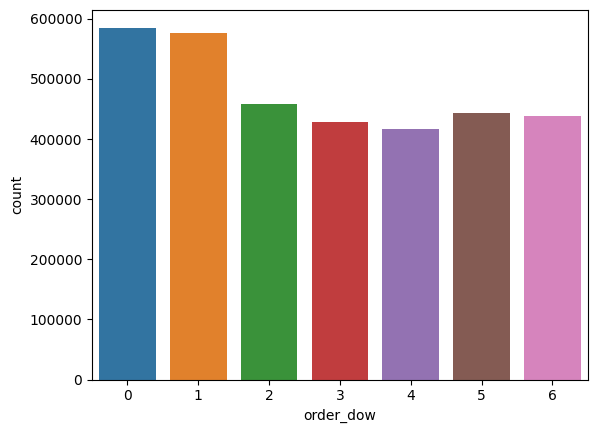

In [6]:
sns.countplot(data=df_orders_prtr, x="order_dow")

##### 2) 시간별 총 주문 상품의 갯수


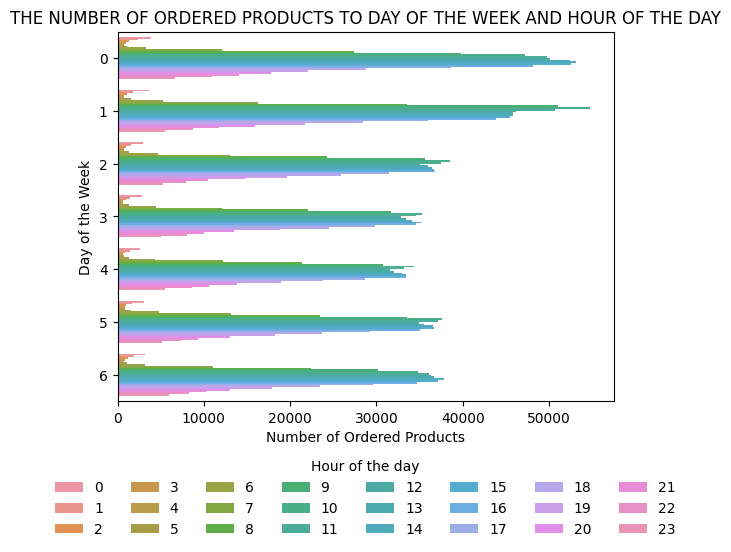

In [7]:
ax = sns.countplot(data=df_orders_prtr, y="order_dow", hue="order_hour_of_day")
ax.set_title("THE NUMBER OF ORDERED PRODUCTS TO DAY OF THE WEEK AND HOUR OF THE DAY")
ax.set_xlabel("Number of Ordered Products")
ax.set_ylabel("Day of the Week")
sns.move_legend(
    ax,
    "lower center",
    bbox_to_anchor=(0.5, -0.4),
    ncol=8,
    title="Hour of the day",
    frameon=False,
)

plt.show()

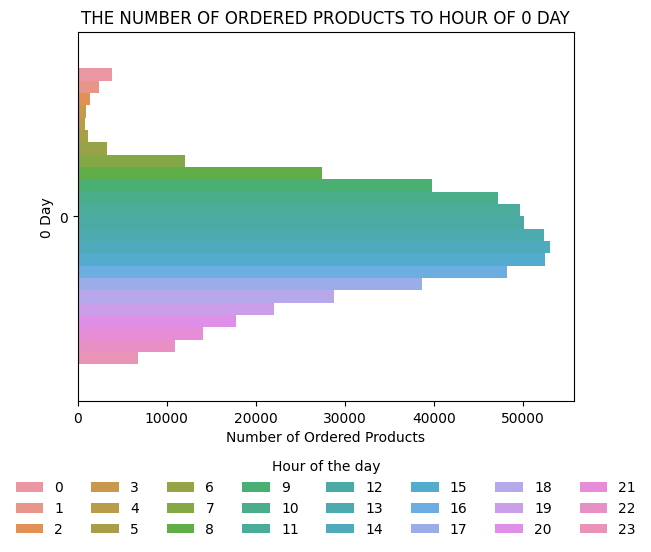

In [8]:
ax = sns.countplot(
    data=df_orders_prtr[df_orders_prtr["order_dow"] == 0],
    y="order_dow",
    hue="order_hour_of_day",
)

ax.set_title("THE NUMBER OF ORDERED PRODUCTS TO HOUR OF 0 DAY")
ax.set_xlabel("Number of Ordered Products")
ax.set_ylabel("0 Day")
sns.move_legend(
    ax,
    "lower center",
    bbox_to_anchor=(0.5, -0.4),
    ncol=8,
    title="Hour of the day",
    frameon=False,
)

plt.show()

##### 3) 가장 많이 주문한 상품의 상품군(Departments)


In [9]:
df_orders_merged = pd.concat([df_order_products_prior, df_order_products_train])
df_orders_merged = df_orders_merged.merge(df_orders_prtr, on="order_id")
df_orders_merged = df_orders_merged.merge(df_products, on="product_id")
df_orders_merged = df_orders_merged.merge(df_aisle, on="aisle_id")
df_orders_merged = df_orders_merged.merge(df_departments, on="department_id")

df_orders_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33819106 entries, 0 to 33819105
Data columns (total 15 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   order_id                int64  
 1   product_id              int64  
 2   add_to_cart_order       int64  
 3   reordered               int64  
 4   user_id                 int64  
 5   eval_set                object 
 6   order_number            int64  
 7   order_dow               int64  
 8   order_hour_of_day       int64  
 9   days_since_prior_order  float64
 10  product_name            object 
 11  aisle_id                int64  
 12  department_id           int64  
 13  aisle                   object 
 14  department              object 
dtypes: float64(1), int64(10), object(4)
memory usage: 3.8+ GB


In [10]:
df_orders_merged.describe()

,order_id,product_id,add_to_cart_order,reordered,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,aisle_id,department_id
count,3.381911e+07,3.381911e+07,3.381911e+07,3.381911e+07,3.381911e+07,3.381911e+07,3.381911e+07,3.381911e+07,3.174104e+07,3.381911e+07,3.381911e+07
mean,1.710566e+06,2.557551e+04,8.367738e+00,5.900617e-01,1.029444e+05,1.713998e+01,2.737285e+00,1.343123e+01,1.136415e+01,7.121799e+01,9.918544e+00
std,9.874008e+05,1.409770e+04,7.139540e+00,4.918220e-01,5.946733e+04,1.749829e+01,2.093296e+00,4.246149e+00,8.940500e+00,3.819898e+01,6.281655e+00
min,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00
25%,8.554130e+05,1.351900e+04,3.000000e+00,0.000000e+00,5.143500e+04,5.000000e+00,1.000000e+00,1.000000e+01,5.000000e+00,3.100000e+01,4.000000e+00
50%,1.710660e+06,2.525600e+04,6.000000e+00,1.000000e+00,1.026260e+05,1.100000e+01,3.000000e+00,1.300000e+01,8.000000e+00,8.300000e+01,9.000000e+00
75%,2.565587e+06,3.793500e+04,1.100000e+01,1.000000e+00,1.544120e+05,2.400000e+01,5.000000e+00,1.600000e+01,1.500000e+01,1.070000e+02,1.600000e+01
max,3.421083e+06,4.968800e+04,1.450000e+02,1.000000e+00,2.062090e+05,1.000000e+02,6.000000e+00,2.300000e+01,3.000000e+01,1.340000e+02,2.100000e+01


In [11]:
df_orders_merged.columns

Index(['order_id', 'product_id', 'add_to_cart_order', 'reordered', 'user_id',
       'eval_set', 'order_number', 'order_dow', 'order_hour_of_day',
       'days_since_prior_order', 'product_name', 'aisle_id', 'department_id',
       'aisle', 'department'],
      dtype='object')

In [12]:
df_orders_dow_dep = df_orders_merged[["order_dow", "department"]]
tmp = df_orders_dow_dep.groupby("order_dow")["department"].value_counts()
df_orders_dow_dep_count = tmp.unstack()
df_orders_dow_dep_count

department,alcohol,babies,bakery,beverages,breakfast,bulk,canned goods,dairy eggs,deli,dry goods pasta,...,household,international,meat seafood,missing,other,pantry,personal care,pets,produce,snacks
order_dow,,,,,,,,,,,,,,,,,,,,,
0,18150,85108,236619,455671,133781,6444,239817,1070923,220115,191654,...,133690,58723,159221,15262,6459,370336,85072,18039,2057869,508562
1,21215,75243,211500,499815,134010,6526,187010,989872,191595,153674,...,126346,48153,123398,12442,6234,316582,75268,15163,1746944,555951
2,21002,58526,158372,385525,99432,4728,138017,733935,140718,115554,...,104634,35759,90113,9459,5171,250162,62543,12383,1244389,413960
3,23293,54229,144756,358740,90534,4408,124363,665526,126970,102895,...,99909,32882,81066,9233,4840,236784,59855,13113,1111911,375557
4,27100,53263,143201,354296,88797,4150,120165,660577,124428,100015,...,97848,30848,80098,9044,4764,234551,57583,12922,1095847,371904
5,28465,53529,160173,392118,98176,4761,134754,740339,140059,108313,...,104254,34235,91659,10512,5293,259372,60673,14372,1231232,410392
6,20069,58845,170560,358010,94339,4915,170731,769895,151655,133235,...,107971,40555,113683,11444,5325,289032,67699,16229,1400186,370086


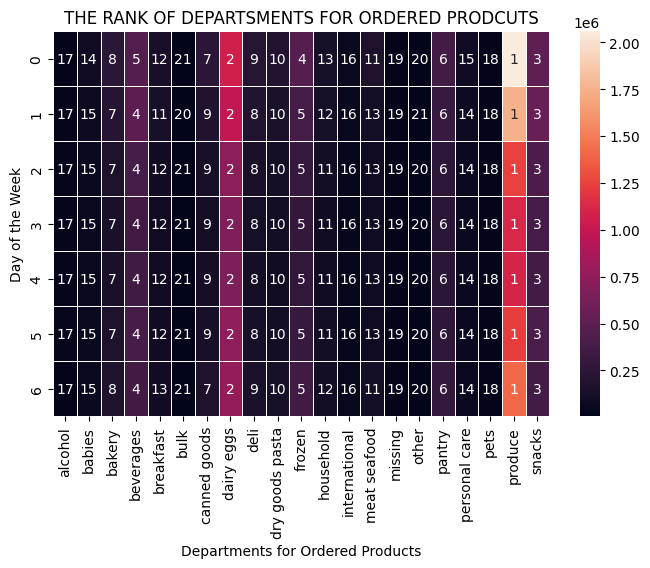

In [13]:
plt.figure(figsize=(8, 5))
sns.heatmap(
    df_orders_dow_dep_count,
    annot=df_orders_dow_dep_count.rank(axis="columns", ascending=False),
    linewidths=0.5,
)
plt.title("THE RANK OF DEPARTSMENTS FOR ORDERED PRODCUTS")
plt.xlabel("Departments for Ordered Products")
plt.ylabel("Day of the Week")

plt.show()

##### 4) 가장 많이 주문한 상품의 상품 종류(Aisles)


In [14]:
df_orders_dow_aisle = df_orders_merged[["order_dow", "aisle"]]
tmp = df_orders_dow_aisle.groupby("order_dow")["aisle"].value_counts()
df_orders_dow_aisle_count = tmp.unstack()
df_orders_dow_aisle_count

aisle,air fresheners candles,asian foods,baby accessories,baby bath body care,baby food formula,bakery desserts,baking ingredients,baking supplies decor,beauty,beers coolers,...,spreads,tea,tofu meat alternatives,tortillas flat bread,trail mix snack mix,trash bags liners,vitamins supplements,water seltzer sparkling water,white wines,yogurt
order_dow,,,,,,,,,,,,,,,,,,,,,
0,3399,35273,1456,1598,77829,5618,60803,4042,1216,4178,...,56194,37057,29320,42637,4519,5761,7963,142025,4130,286621
1,3118,29875,1411,1447,68255,5256,51468,3503,949,7042,...,52977,49879,21648,34687,8065,5552,8110,162600,4300,278170
2,2745,22469,1131,1207,52552,4976,43115,3219,846,6782,...,39837,38167,16390,26055,5804,4692,6584,122716,4265,200396
3,2805,20854,1126,1203,48427,4785,41901,3160,800,7879,...,37112,34906,14990,22594,5112,4361,6320,113071,4559,177322
4,2631,19131,1097,1144,47561,5004,43002,3432,748,10023,...,35719,33447,14740,22417,4951,4248,5953,110710,4863,174801
5,3031,21415,1083,1115,47826,5378,47943,3645,855,9839,...,39282,36980,16619,24345,5477,4488,5991,120602,5195,196620
6,3189,24597,1162,1195,53204,5355,51548,3785,1041,4753,...,40381,28281,20890,28915,3125,4600,6107,106426,4334,193653


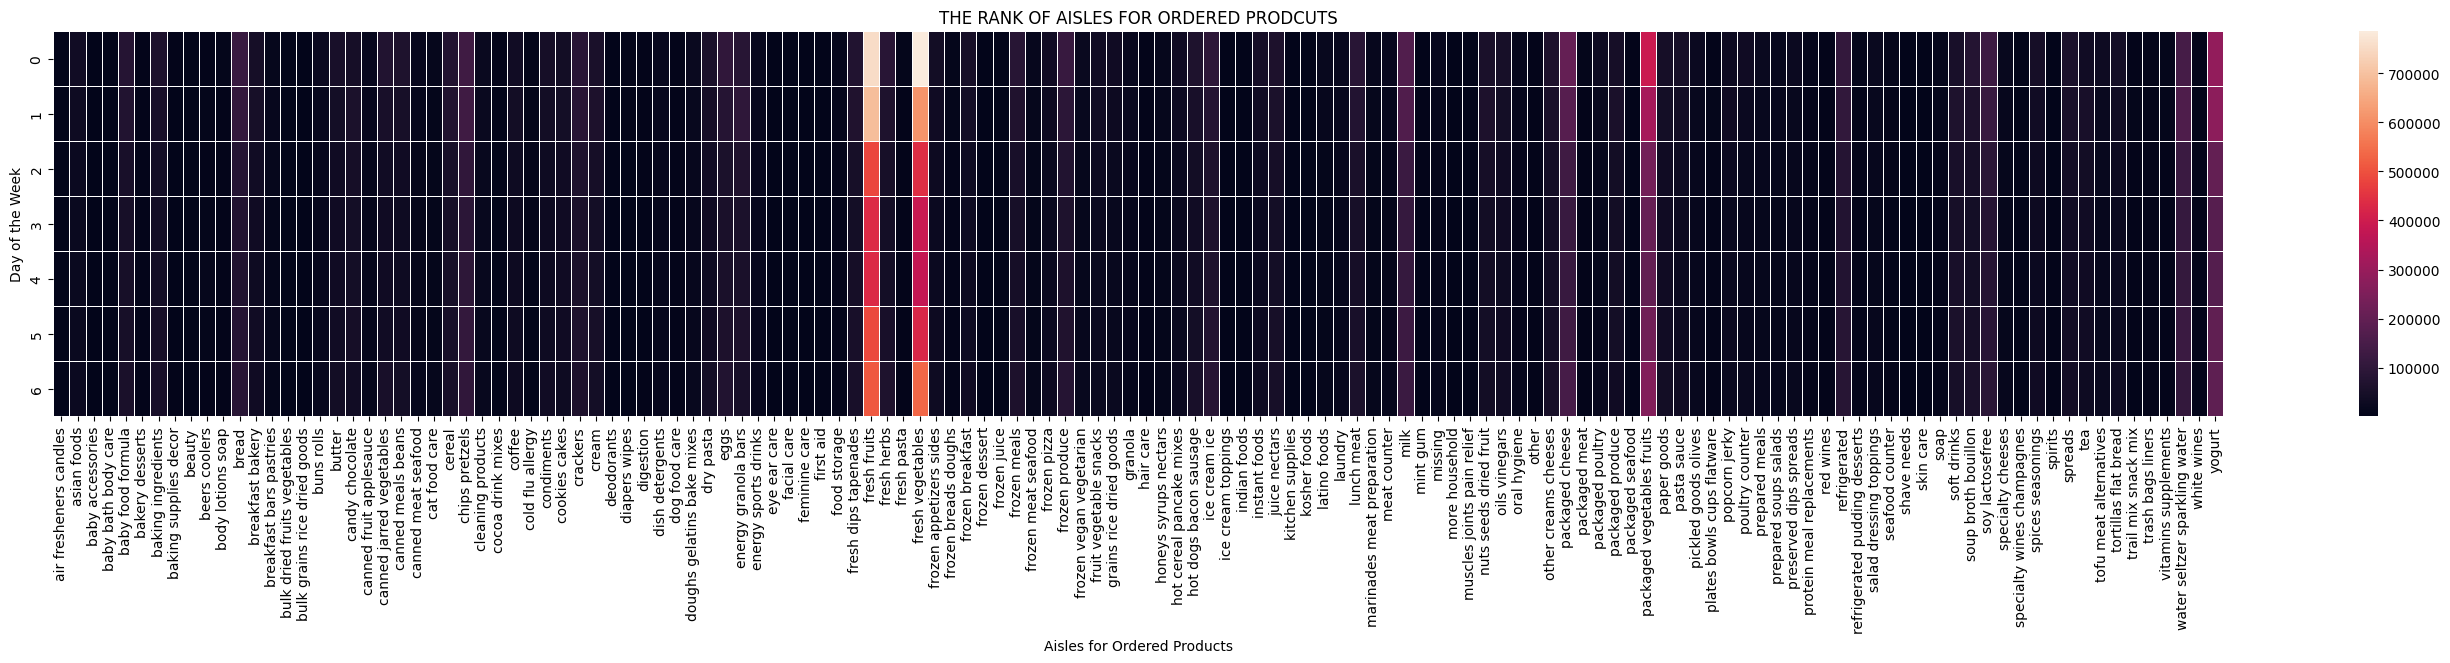

In [15]:
plt.figure(figsize=(35, 5))
sns.heatmap(
    df_orders_dow_aisle_count,
    # annot=df_orders_dow_aisle_count.rank(axis="columns", ascending=False),
    linewidths=0.5,
    # cbar=False,
)
plt.title("THE RANK OF AISLES FOR ORDERED PRODCUTS")
plt.xlabel("Aisles for Ordered Products")
plt.ylabel("Day of the Week")

plt.show()

In [16]:
df_orders_dow_dep_aisle = df_orders_merged[["order_dow", "department", "aisle"]]
tmp = df_orders_dow_dep_aisle.groupby(["department", "aisle"])[
    "order_dow"
].value_counts()
df_orders_dow_dep_aisle_count = tmp.unstack()
df_orders_dow_dep_aisle_count

order_dow                                  0      1      2      3      4  \
department aisle                                                           
alcohol    beers coolers                4178   7042   6782   7879  10023   
           red wines                    4797   5068   4933   5243   5589   
           specialty wines champagnes   1465   1271   1465   1682   1863   
           spirits                      3580   3534   3557   3930   4762   
           white wines                  4130   4300   4265   4559   4863   
...                                      ...    ...    ...    ...    ...   
snacks     ice cream toppings           1865   1711   1526   1527   1561   
           mint gum                     2511   4873   3952   3459   3221   
           nuts seeds dried fruit      55153  59365  43920  39714  38836   
           popcorn jerky               27967  32493  23831  21129  20623   
           trail mix snack mix          4519   8065   5804   5112   4951   

order_dow                                  5      6  
department aisle                                     
alcohol    beers coolers                9839   4753  
           red wines                    5986   4808  
           specialty wines champagnes   2038   1875  
           spirits                      5407   4299  
           white wines                  5195   4334  
...                                      ...    ...  
snacks     ice cream toppings           1759   1757  
           mint gum                     3540   2070  
           nuts seeds dried fruit      42233  39798  
           popcorn jerky               23708  20690  
           trail mix snack mix          5477   3125  

[134 rows x 7 columns]

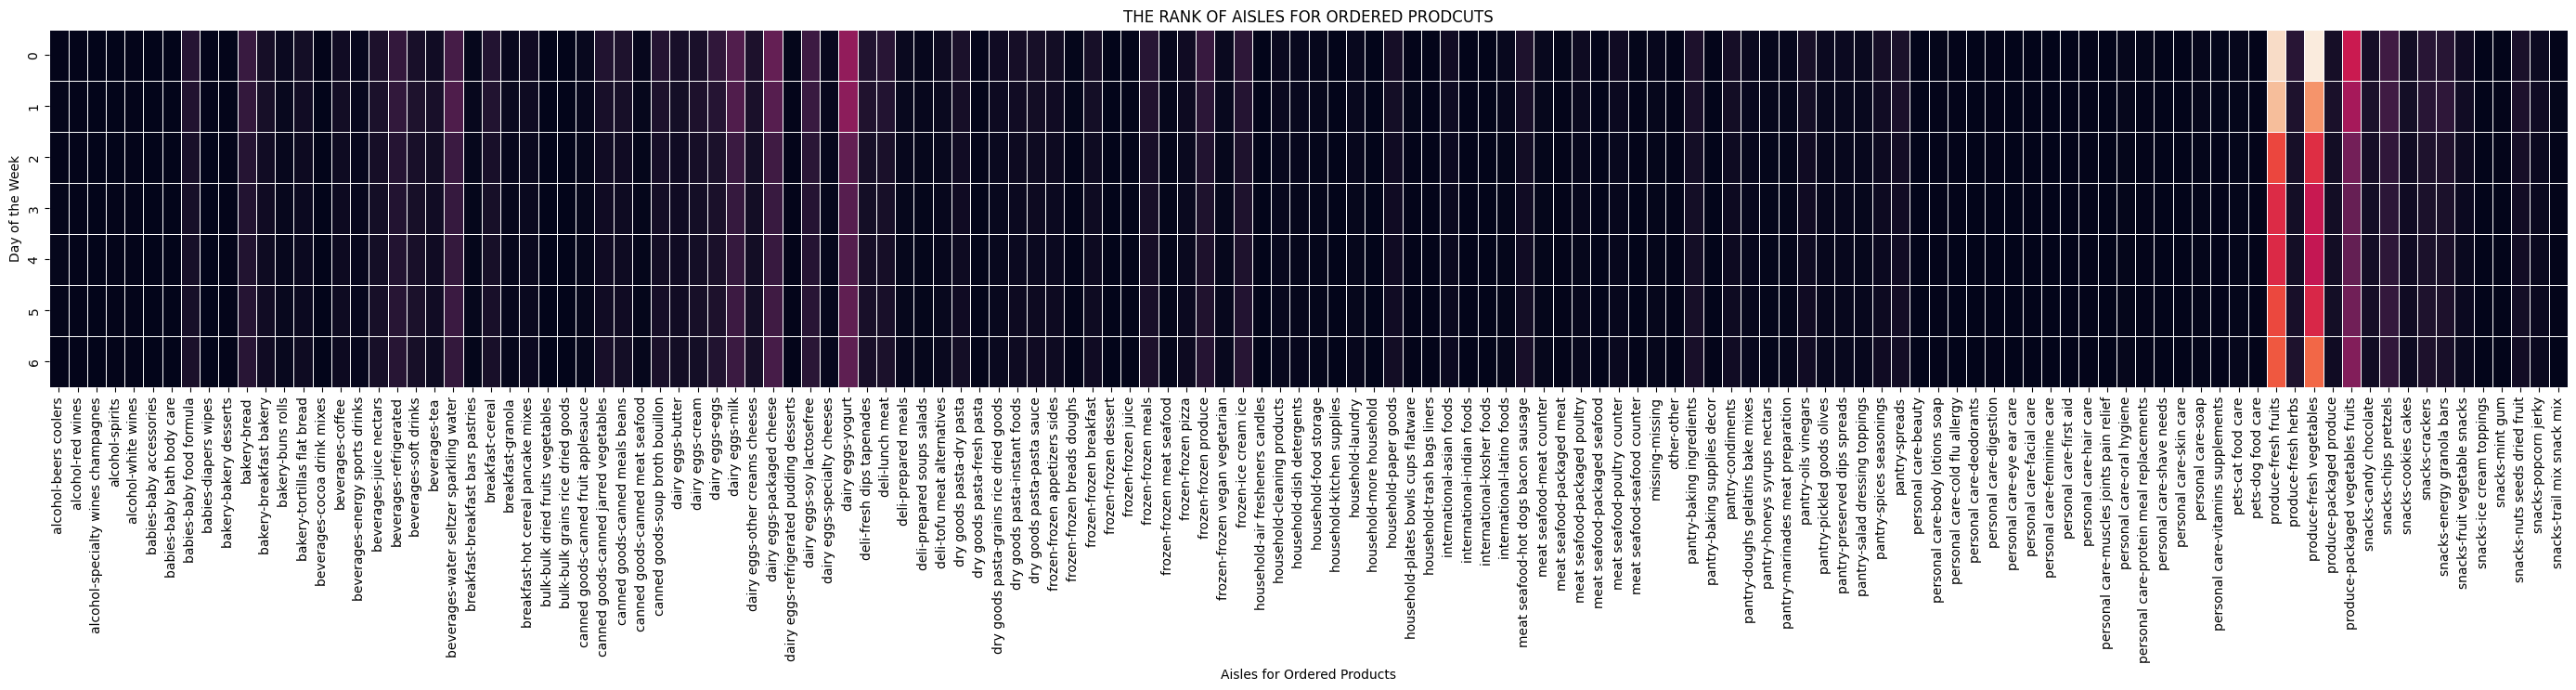

In [17]:
plt.figure(figsize=(35, 5))
sns.heatmap(
    df_orders_dow_dep_aisle_count.T,
    # annot=df_orders_dow_aisle_count.rank(axis="columns", ascending=False),
    linewidths=0.5,
    cbar=False,
)
plt.title("THE RANK OF AISLES FOR ORDERED PRODCUTS")
plt.xlabel("Aisles for Ordered Products")
plt.ylabel("Day of the Week")

plt.show()

##### 5) 요일별 상위 5개 주문 상품


In [18]:
df_orders_merged.columns

Index(['order_id', 'product_id', 'add_to_cart_order', 'reordered', 'user_id',
       'eval_set', 'order_number', 'order_dow', 'order_hour_of_day',
       'days_since_prior_order', 'product_name', 'aisle_id', 'department_id',
       'aisle', 'department'],
      dtype='object')

In [19]:
df_orders_products = (
    df_orders_merged.groupby("order_dow")["product_name"].value_counts().unstack()
)
df_orders_products

product_name,#2 Coffee Filters,#2 Cone White Coffee Filters,#2 Mechanical Pencils,#4 Natural Brown Coffee Filters,& Go! Hazelnut Spread + Pretzel Sticks,'Swingtop' Premium Lager,(70% Juice!) Mountain Raspberry Juice Squeeze,+Energy Black Cherry Vegetable & Fruit Juice,".5\"" Waterproof Tape",0 Calorie Acai Raspberry Water Beverage,...,with Twist Ties Sandwich & Storage Bags,with Xylitol Cinnamon 18 Sticks Sugar Free Gum,with Xylitol Island Berry Lime 18 Sticks Sugar Free Gum,with Xylitol Minty Sweet Twist 18 Sticks Sugar Free Gum,with Xylitol Original Flavor 18 Sticks Sugar Free Gum,with Xylitol Unwrapped Original Flavor 50 Sticks Sugar Free Gum,with Xylitol Unwrapped Spearmint 50 Sticks Sugar Free Gum,with Xylitol Watermelon Twist 18 Sticks Sugar Free Gum,with a Splash of Mango Coconut Water,with a Splash of Pineapple Coconut Water
order_dow,,,,,,,,,,,,,,,,,,,,,
0,144.0,1.0,1.0,49.0,17.0,1.0,6.0,3.0,4.0,12.0,...,3.0,12.0,8.0,9.0,33.0,4.0,8.0,11.0,4.0,10.0
1,149.0,3.0,2.0,38.0,40.0,NaN,3.0,9.0,1.0,23.0,...,1.0,40.0,5.0,2.0,28.0,6.0,9.0,13.0,5.0,13.0
2,121.0,NaN,2.0,32.0,44.0,NaN,6.0,3.0,1.0,14.0,...,5.0,37.0,8.0,1.0,20.0,6.0,5.0,8.0,1.0,5.0
3,85.0,4.0,NaN,31.0,19.0,NaN,1.0,4.0,NaN,11.0,...,3.0,28.0,2.0,3.0,25.0,10.0,12.0,14.0,2.0,5.0
4,93.0,1.0,2.0,31.0,18.0,NaN,1.0,4.0,NaN,14.0,...,3.0,42.0,10.0,7.0,36.0,7.0,2.0,10.0,6.0,5.0
5,99.0,2.0,1.0,43.0,21.0,NaN,2.0,3.0,NaN,13.0,...,1.0,23.0,7.0,2.0,22.0,5.0,13.0,8.0,2.0,6.0
6,108.0,3.0,1.0,23.0,15.0,NaN,9.0,4.0,2.0,12.0,...,6.0,18.0,10.0,3.0,28.0,3.0,8.0,10.0,7.0,13.0


In [20]:
for i in range(len(df_orders_products.index)):
    print(i)
    products_days = df_orders_products.loc[i].sort_values(ascending=False)
    print(products_days[:5])
    print()

0
product_name
Banana                    101474.0
Bag of Organic Bananas     75052.0
Organic Baby Spinach       57556.0
Organic Strawberries       56635.0
Organic Hass Avocado       45841.0
Name: 0, dtype: float64

1
product_name
Banana                    90750.0
Bag of Organic Bananas    72206.0
Organic Strawberries      47897.0
Organic Baby Spinach      43819.0
Organic Hass Avocado      39660.0
Name: 1, dtype: float64

2
product_name
Banana                    62002.0
Bag of Organic Bananas    52122.0
Organic Strawberries      33619.0
Organic Baby Spinach      31094.0
Organic Hass Avocado      28520.0
Name: 2, dtype: float64

3
product_name
Banana                    55334.0
Bag of Organic Bananas    47204.0
Organic Strawberries      31670.0
Organic Baby Spinach      26855.0
Organic Hass Avocado      25287.0
Name: 3, dtype: float64

4
product_name
Banana                    54447.0
Bag of Organic Bananas    46358.0
Organic Strawberries      31886.0
Organic Baby Spinach      26290.0
Orga

##### 6) 요일별 상위 5개 재주문 상품


In [21]:
df_orders_products_reordered = (
    df_orders_merged[df_orders_merged["reordered"] == 1]
    .groupby("order_dow")["product_name"]
    .value_counts()
    .unstack()
)
df_orders_products_reordered

product_name,#2 Coffee Filters,#2 Cone White Coffee Filters,#4 Natural Brown Coffee Filters,& Go! Hazelnut Spread + Pretzel Sticks,(70% Juice!) Mountain Raspberry Juice Squeeze,+Energy Black Cherry Vegetable & Fruit Juice,0 Calorie Acai Raspberry Water Beverage,0 Calorie Fuji Apple Pear Water Beverage,0 Calorie Strawberry Dragonfruit Water Beverage,0% Fat Black Cherry Greek Yogurt y,...,with Twist Ties Sandwich & Storage Bags,with Xylitol Cinnamon 18 Sticks Sugar Free Gum,with Xylitol Island Berry Lime 18 Sticks Sugar Free Gum,with Xylitol Minty Sweet Twist 18 Sticks Sugar Free Gum,with Xylitol Original Flavor 18 Sticks Sugar Free Gum,with Xylitol Unwrapped Original Flavor 50 Sticks Sugar Free Gum,with Xylitol Unwrapped Spearmint 50 Sticks Sugar Free Gum,with Xylitol Watermelon Twist 18 Sticks Sugar Free Gum,with a Splash of Mango Coconut Water,with a Splash of Pineapple Coconut Water
order_dow,,,,,,,,,,,,,,,,,,,,,
0,35.0,NaN,19.0,9.0,2.0,2.0,10.0,24.0,19.0,34.0,...,3.0,6.0,4.0,5.0,17.0,1.0,1.0,5.0,NaN,3.0
1,53.0,NaN,14.0,21.0,2.0,4.0,18.0,18.0,35.0,17.0,...,1.0,28.0,1.0,1.0,9.0,3.0,2.0,6.0,2.0,6.0
2,46.0,NaN,15.0,24.0,4.0,1.0,5.0,21.0,39.0,10.0,...,1.0,28.0,6.0,1.0,9.0,2.0,2.0,5.0,1.0,3.0
3,26.0,2.0,11.0,8.0,1.0,2.0,6.0,18.0,26.0,11.0,...,NaN,22.0,2.0,1.0,10.0,7.0,5.0,7.0,NaN,2.0
4,39.0,NaN,10.0,11.0,NaN,1.0,11.0,28.0,38.0,7.0,...,2.0,29.0,8.0,5.0,20.0,1.0,1.0,6.0,NaN,4.0
5,31.0,NaN,14.0,11.0,NaN,1.0,5.0,18.0,18.0,6.0,...,1.0,16.0,3.0,NaN,11.0,2.0,6.0,3.0,NaN,4.0
6,35.0,1.0,7.0,9.0,7.0,1.0,10.0,21.0,21.0,6.0,...,1.0,12.0,5.0,3.0,16.0,1.0,3.0,2.0,4.0,4.0


In [22]:
for i in range(len(df_orders_products_reordered.index)):
    print(i)
    products_days = df_orders_products_reordered.loc[i].sort_values(ascending=False)
    print(products_days[:5])
    print()

0
product_name
Banana                    85538.0
Bag of Organic Bananas    62553.0
Organic Baby Spinach      44594.0
Organic Strawberries      44399.0
Organic Hass Avocado      36458.0
Name: 0, dtype: float64

1
product_name
Banana                    77042.0
Bag of Organic Bananas    60322.0
Organic Strawberries      37229.0
Organic Baby Spinach      33754.0
Organic Hass Avocado      31611.0
Name: 1, dtype: float64

2
product_name
Banana                    52035.0
Bag of Organic Bananas    43240.0
Organic Strawberries      26381.0
Organic Baby Spinach      23887.0
Organic Hass Avocado      22760.0
Name: 2, dtype: float64

3
product_name
Banana                    46668.0
Bag of Organic Bananas    39248.0
Organic Strawberries      24553.0
Organic Baby Spinach      20594.0
Organic Hass Avocado      20101.0
Name: 3, dtype: float64

4
product_name
Banana                    46206.0
Bag of Organic Bananas    38711.0
Organic Strawberries      24929.0
Organic Baby Spinach      20538.0
Organic H

In [23]:
df_orders_products
df_orders_products_reordered

product_name,#2 Coffee Filters,#2 Cone White Coffee Filters,#4 Natural Brown Coffee Filters,& Go! Hazelnut Spread + Pretzel Sticks,(70% Juice!) Mountain Raspberry Juice Squeeze,+Energy Black Cherry Vegetable & Fruit Juice,0 Calorie Acai Raspberry Water Beverage,0 Calorie Fuji Apple Pear Water Beverage,0 Calorie Strawberry Dragonfruit Water Beverage,0% Fat Black Cherry Greek Yogurt y,...,with Twist Ties Sandwich & Storage Bags,with Xylitol Cinnamon 18 Sticks Sugar Free Gum,with Xylitol Island Berry Lime 18 Sticks Sugar Free Gum,with Xylitol Minty Sweet Twist 18 Sticks Sugar Free Gum,with Xylitol Original Flavor 18 Sticks Sugar Free Gum,with Xylitol Unwrapped Original Flavor 50 Sticks Sugar Free Gum,with Xylitol Unwrapped Spearmint 50 Sticks Sugar Free Gum,with Xylitol Watermelon Twist 18 Sticks Sugar Free Gum,with a Splash of Mango Coconut Water,with a Splash of Pineapple Coconut Water
order_dow,,,,,,,,,,,,,,,,,,,,,
0,35.0,NaN,19.0,9.0,2.0,2.0,10.0,24.0,19.0,34.0,...,3.0,6.0,4.0,5.0,17.0,1.0,1.0,5.0,NaN,3.0
1,53.0,NaN,14.0,21.0,2.0,4.0,18.0,18.0,35.0,17.0,...,1.0,28.0,1.0,1.0,9.0,3.0,2.0,6.0,2.0,6.0
2,46.0,NaN,15.0,24.0,4.0,1.0,5.0,21.0,39.0,10.0,...,1.0,28.0,6.0,1.0,9.0,2.0,2.0,5.0,1.0,3.0
3,26.0,2.0,11.0,8.0,1.0,2.0,6.0,18.0,26.0,11.0,...,NaN,22.0,2.0,1.0,10.0,7.0,5.0,7.0,NaN,2.0
4,39.0,NaN,10.0,11.0,NaN,1.0,11.0,28.0,38.0,7.0,...,2.0,29.0,8.0,5.0,20.0,1.0,1.0,6.0,NaN,4.0
5,31.0,NaN,14.0,11.0,NaN,1.0,5.0,18.0,18.0,6.0,...,1.0,16.0,3.0,NaN,11.0,2.0,6.0,3.0,NaN,4.0
6,35.0,1.0,7.0,9.0,7.0,1.0,10.0,21.0,21.0,6.0,...,1.0,12.0,5.0,3.0,16.0,1.0,3.0,2.0,4.0,4.0


##### 7) 총 재주문 상품 상위 100개 및 하위 100개의 평균 재주문 횟수


- 재주문한 상품 상위 100개


In [24]:
df_orders_merged.columns

Index(['order_id', 'product_id', 'add_to_cart_order', 'reordered', 'user_id',
       'eval_set', 'order_number', 'order_dow', 'order_hour_of_day',
       'days_since_prior_order', 'product_name', 'aisle_id', 'department_id',
       'aisle', 'department'],
      dtype='object')

In [25]:
df_orders

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0
...,...,...,...,...,...,...,...
3421078,2266710,206209,prior,10,5,18,29.0
3421079,1854736,206209,prior,11,4,10,30.0
3421080,626363,206209,prior,12,1,12,18.0
3421081,2977660,206209,prior,13,1,12,7.0


In [26]:
df_orders_merged.isnull().sum()

order_id                        0
product_id                      0
add_to_cart_order               0
reordered                       0
user_id                         0
eval_set                        0
order_number                    0
order_dow                       0
order_hour_of_day               0
days_since_prior_order    2078068
product_name                    0
aisle_id                        0
department_id                   0
aisle                           0
department                      0
dtype: int64

In [27]:
tmp = df_orders_merged[df_orders_merged["reordered"] == 1][
    "product_name"
].value_counts()
reordered_products_count = tmp.reset_index()
reordered_products_count

,product_name,count
0,Banana,415166
1,Bag of Organic Bananas,329275
2,Organic Strawberries,214448
3,Organic Baby Spinach,194939
4,Organic Hass Avocado,176173
...,...,...
45598,Cajun Spice Blend,1
45599,Honey Mustard & Onion Pretzel Pieces,1
45600,Slow Churned Yogurt Blends Chocolate Vanilla S...,1
45601,Sauce Garlic Herb Marinade,1


In [28]:
reordered_product_names_top100 = reordered_products_count.iloc[:100].keys()
reordered_product_names_top100

Index(['product_name', 'count'], dtype='object')

In [29]:
tmp = (
    df_orders_merged[df_orders_merged["reordered"] == 1]
    .groupby("product_name")["add_to_cart_order"]
    .mean()
)
tmp = tmp.reset_index()
tmp = tmp.merge(reordered_products_count, on="product_name")
reordered_products_cart_order = tmp.sort_values(
    by=["count", "add_to_cart_order"], ascending=False
).reset_index()

reordered_products_cart_order

,index,product_name,add_to_cart_order,count
0,3285,Banana,4.720577,415166
1,3095,Bag of Organic Bananas,4.869352,329275
2,29270,Organic Strawberries,7.149794,214448
3,26334,Organic Baby Spinach,7.264714,194939
4,27718,Organic Hass Avocado,6.573612,176173
...,...,...,...,...
45598,45194,Xtremes Rainbow Berry Chewy Candy,1.000000,1
45599,45332,"Yogurt Spread, Mediterranean, Original",1.000000,1
45600,45468,ZeroMercury 357 Battery - 3 CT,1.000000,1
45601,45470,Zester/Grater,1.000000,1


In [30]:
reordered_products_cart_order_t100 = reordered_products_cart_order.head(100)
reordered_products_cart_order_t100

,index,product_name,add_to_cart_order,count
0,3285,Banana,4.720577,415166
1,3095,Bag of Organic Bananas,4.869352,329275
2,29270,Organic Strawberries,7.149794,214448
3,26334,Organic Baby Spinach,7.264714,194939
4,27718,Organic Hass Avocado,6.573612,176173
...,...,...,...,...
95,36922,Shredded Parmesan,8.923204,24259
96,3439,Bartlett Pears,7.586672,23814
97,13380,Fat Free Milk,5.170626,23531
98,43082,Vanilla Almond Breeze Almond Milk,5.497130,23519


In [31]:
reordered_products_cart_order_b100 = reordered_products_cart_order.tail(100)
reordered_products_cart_order_b100

,index,product_name,add_to_cart_order,count
45503,32887,Preference Fade-Defying Color + Shine System 9...,1.0,1
45504,32966,Premium Genoa,1.0,1
45505,33006,Premium Lite Coconut Milk,1.0,1
45506,33109,"Prenatal Multivitamin, Vegetarian, Capsules",1.0,1
45507,33221,Pro Health Multi Protection Refreshing Clean M...,1.0,1
...,...,...,...,...
45598,45194,Xtremes Rainbow Berry Chewy Candy,1.0,1
45599,45332,"Yogurt Spread, Mediterranean, Original",1.0,1
45600,45468,ZeroMercury 357 Battery - 3 CT,1.0,1
45601,45470,Zester/Grater,1.0,1


In [32]:
reordered_products_cart_order_concated = pd.concat(
    [reordered_products_cart_order_t100, reordered_products_cart_order_b100]
)

reordered_products_cart_order_concated["top"] = 1
reordered_products_cart_order_concated.loc[101:, "top"] = 0

reordered_products_cart_order_concated

,index,product_name,add_to_cart_order,count,top
0,3285,Banana,4.720577,415166,1
1,3095,Bag of Organic Bananas,4.869352,329275,1
2,29270,Organic Strawberries,7.149794,214448,1
3,26334,Organic Baby Spinach,7.264714,194939,1
4,27718,Organic Hass Avocado,6.573612,176173,1
...,...,...,...,...,...
45598,45194,Xtremes Rainbow Berry Chewy Candy,1.000000,1,0
45599,45332,"Yogurt Spread, Mediterranean, Original",1.000000,1,0
45600,45468,ZeroMercury 357 Battery - 3 CT,1.000000,1,0
45601,45470,Zester/Grater,1.000000,1,0


/Users/jlee/anaconda3/envs/noname/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/jlee/anaconda3/envs/noname/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/jlee/anaconda3/envs/noname/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/jlee/anaconda3/envs/noname/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and

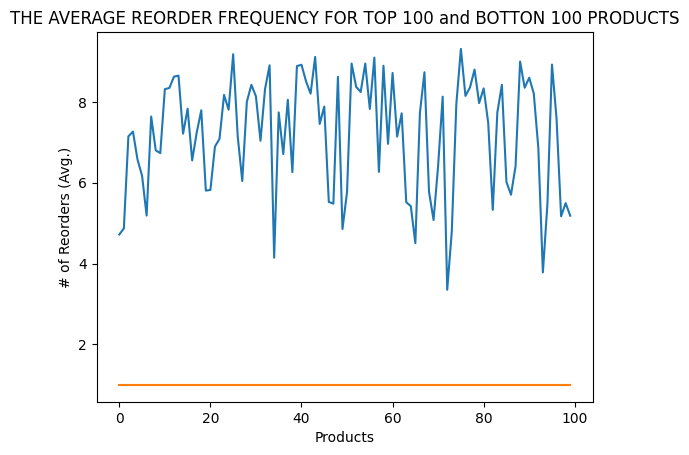

In [33]:
sns.lineplot(
    data=reordered_products_cart_order_concated[:100],
    x=[i for i in range(100)],
    y="add_to_cart_order",
)
sns.lineplot(
    data=reordered_products_cart_order_concated[100:],
    x=[i for i in range(100)],
    y="add_to_cart_order",
)

plt.title("THE AVERAGE REORDER FREQUENCY FOR TOP 100 and BOTTON 100 PRODUCTS")
plt.xlabel("Products")
plt.ylabel("# of Reorders (Avg.)")
plt.show()

##### 8) 재주문 상품이 이전 장바구니에서 포함된 확률


##### 9) 재주문 상품의 이전 장바구니들에 대한 평균 우선 순위


In [ ]:
df_orders_merged.head()